In [12]:
import numpy as np
import pandas as pd
import BiochemToolbox as BT

file_location = "data1/setup/"
plate_name = "Plate2_setup"
file_name = file_location + plate_name + ".csv"


setupdata = BT.make_plate_data_for_setup(file_name)

pH = 7.0
e_NPA = BT.calculate_e_NPA(pH)
setupdata

,row_name,S_conc,lane_name,E_conc,kcat,Vmax,KM,Enzyme
0,A,0.000005,1,0.000000e+00,60,0.000000e+00,0.00100,Blank
1,B,0.000010,2,5.000000e-10,5400,2.700000e-06,0.00005,BL_4KH
2,C,0.000020,3,5.000000e-10,2700,1.350000e-06,0.00075,BL_8MM
3,D,0.000030,4,5.000000e-10,9000,4.500000e-06,0.00005,BL_RA5
4,E,0.000060,5,5.000000e-10,1320,6.600000e-07,0.00005,BL_7QH
5,F,0.000100,6,5.000000e-10,4800,2.400000e-06,0.00020,BL_L5Q
6,G,0.000200,7,5.000000e-10,4380,2.190000e-06,0.00015,BL_273
7,H,0.000500,8,5.000000e-10,1800,9.000000e-07,0.00005,BL_I82


In [19]:
### This creates the data set separate x,y data files names as lane,row

out_file_location = "data1/"
out_plate_name = "Plate1"
out_file_name_root = out_file_location + out_plate_name


#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT

import numpy as np
import pandas as pd

def make_data_files_plates(setupdata):
    '''Will take the dataframe of setupdata and output a series of csv files 
    that represent the plate reader data for the experiment
    
    '''

    eq, f = BT.get_integrated_MM_function()  # eq is sympy equation object, f is the corresponding function

    time_start = 0.5        ### start at 30 second (0.5 minutes)
    time_end = 60           ### The end time (minutes)
    n_points = 360          ### number of points - increase if needed

    voltage_error = 0.001   ### parameters to define output range and error
    random_error = 0.001
    max_value = 4

    dt = time_end / n_points          ### time step, delta t
    t_line = np.arange(time_start,    ### time vector (list of time points)
                    time_end + dt, 
                    dt) 

    ### Note: Lane names, enzyme conc list, KM list and Vmax list must all be
    ### same length or this will fail. Row names and row concentration lists 
    ### must also have equal lengths.

    parameters = zip(setupdata["lane_name"], 
                    setupdata["Enzyme"], 
                    setupdata["Vmax"], 
                    setupdata["KM"])
    row_info = zip(setupdata["row_name"], 
                    setupdata["S_conc"])

    for p in parameters:
        lane_name, E_name, Vmax_value, KM_value = p   ### unpack kcat, KM and [E]
        #print(lane_name)

        for row in row_info:
            row_name, S0_value = row      ### unpack row name and substrate conc
            plate_df = pd.DataFrame([])   ### start with empty dataframe
            #print(row_name)

            ### Calculate product from enzyme reaction 
            product_E = S0_value - f(t_line, S0_value, KM_value, Vmax_value)   
            product_E = np.real(product_E)  ### complex numbers fixed

            ### Calculate product from uncatalyzed reaction 
            product_NPA = S0_value - S0_value * np.exp(-1E-3 * t_line)
            product = product_E + product_NPA
            absorbance = product * e_NPA   ### result in absorbance units

            ### Add voltage error 
            fraction_transmittance  = 1 / (10 ** absorbance)                      
            fraction_transmittance = np.random.normal(fraction_transmittance, 
                                                    voltage_error, 
                                                    len(fraction_transmittance))
            absorbance = -np.log10(fraction_transmittance)

            ### Add random error
            absorbance = np.random.normal(absorbance,     
                                        random_error, 
                                        len(absorbance))   

            absorbance[absorbance > max_value] = max_value   ### cap values 
            absorbance = np.nan_to_num(absorbance,  ### replace NaN with max value
                            copy = True, 
                            nan = max_value)   

            ### insert the two data arrays into the dataframe
            plate_df["time"] = t_line
            plate_df["abs"] = absorbance

            ### Write data out to file using lane_name and row_name
            out_file_name = str(out_file_name_root) + "_" + str(lane_name) + "_" \
                + str(row_name) + ".csv"
            
            plate_df.to_csv(out_file_name, float_format='%10.4g')



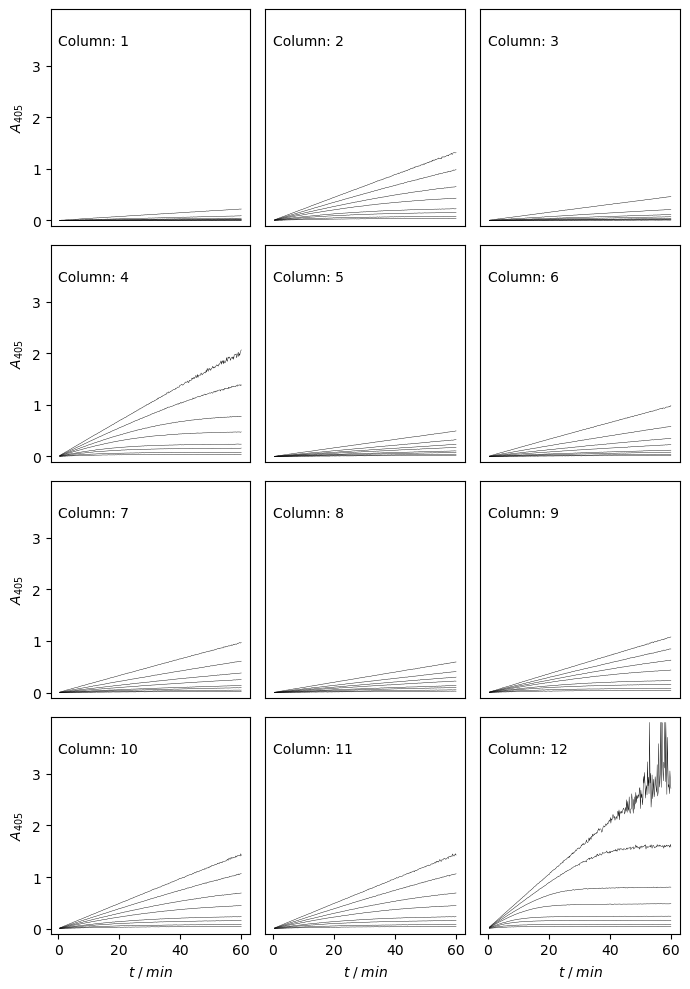

Plot saved as plots/plot_contact_sheet.pdf


Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

In [18]:
### Contact sheet. Ticks deleted on plots inside the set.
#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT


BT.contact_sheet("data1/plate1", fancy = False)
eq

In [26]:
import random
import string

for x in range(11):
   random_string = ''.join(random.choices(string.ascii_uppercase + string.digits, k=3))
   print(random_string)



74V
EU4
1FJ
7DD
06Q
HHN
N4Y
ILN
KK7
LSX
AWA


In [27]:
import random

zipped =  random.sample(range(15, 233), 11), round(random.uniform(33.33, 66.66), 2)

for x in random.sample(range(15, 233), 11):
    print(str(x)+",      "+str(round(random.uniform(0.01, 0.80), 2)))

77,      0.57
104,      0.06
47,      0.67
215,      0.08
175,      0.55
24,      0.42
176,      0.23
26,      0.19
52,      0.26
68,      0.25
136,      0.11
